In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df=df.drop(['month','day','year'],axis=1)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
df['Classes']=df['Classes'].str.strip()
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [7]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
x=df.drop(['FWI'],axis=1)

In [10]:
y=df['FWI']


In [11]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [13]:
x_train.shape , x_test.shape

((182, 11), (61, 11))

<Axes: >

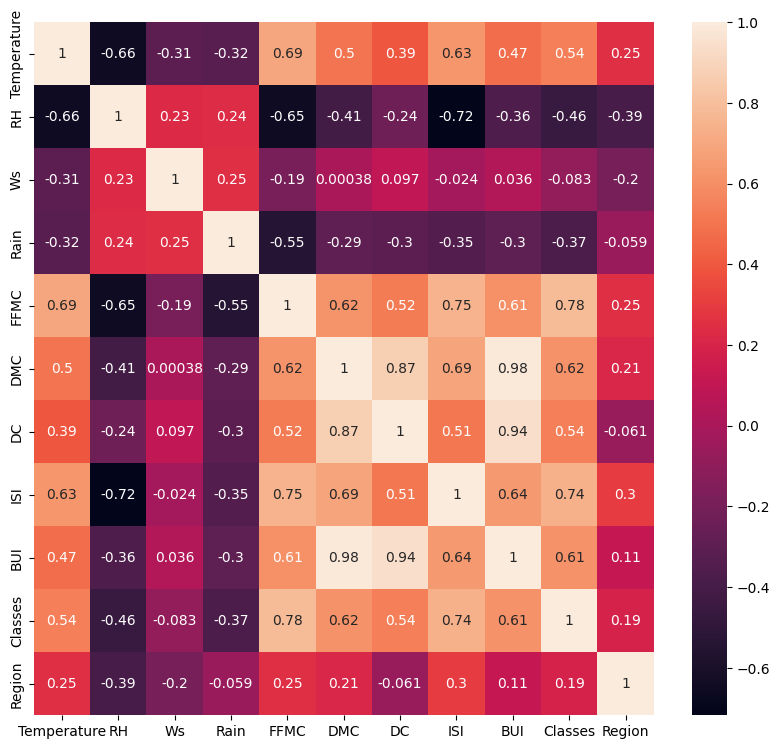

In [14]:
plt.figure(figsize=(10,9))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [15]:
def correlation(dataset,thresold):
    col_cor=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>thresold):
                colname=corr_matrix.columns[i]
                col_cor.add(colname)
    return col_cor

In [16]:
corr_features=correlation(x_train,0.85)

In [17]:
x_train.drop(corr_features,axis=1,inplace=True)

In [18]:
x_test.drop(corr_features,axis=1,inplace=True)

In [19]:
x_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


In [20]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [21]:
x_train_scaled


array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'x_train after standardization')

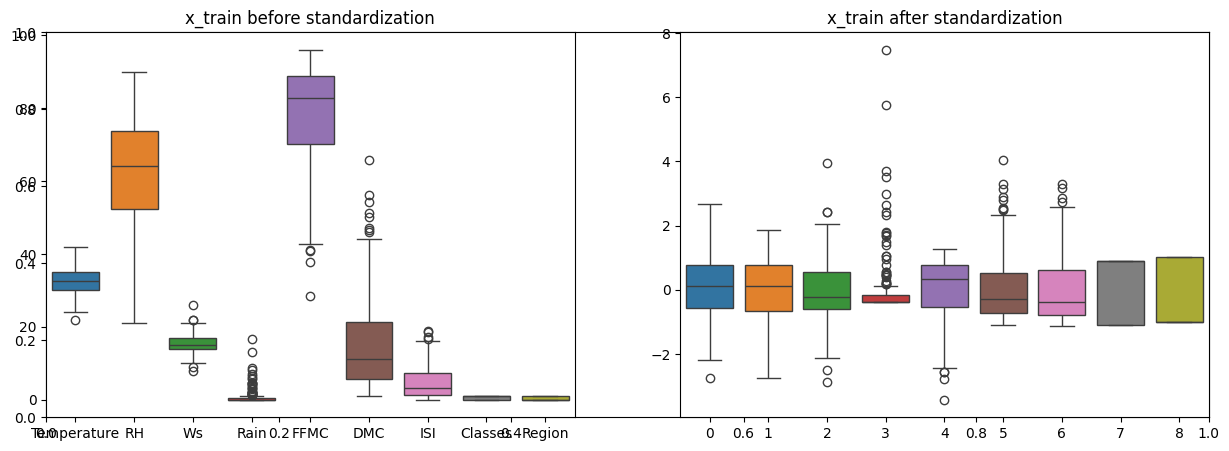

In [22]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before standardization')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after standardization')

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

mean squared error is 0.5468236465249978 and score is 0.9847657384266951


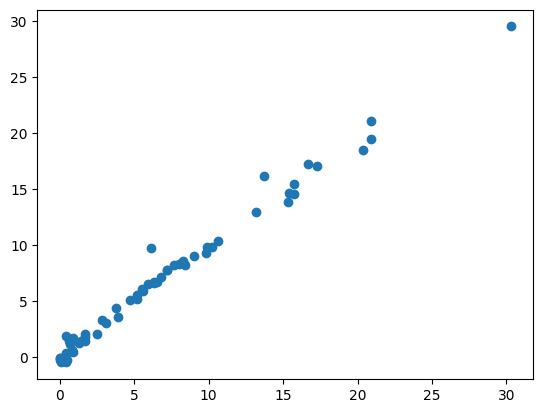

In [24]:
model.fit(x_train_scaled,y_train)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred=model.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'mean squared error is {mae} and score is {score}')
plt.scatter(y_test,y_pred)

mean squared error is 0.5468236465249978 and score is 0.9847657384266951


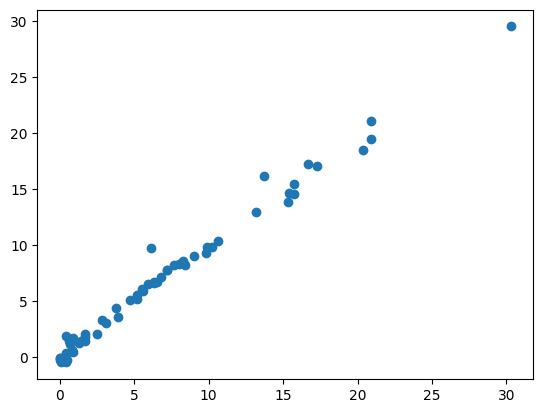

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'mean squared error is {mae} and score is {score}')
plt.scatter(y_test,y_pred)

mean squared error is 0.5468236465249978 and score is 0.9847657384266951


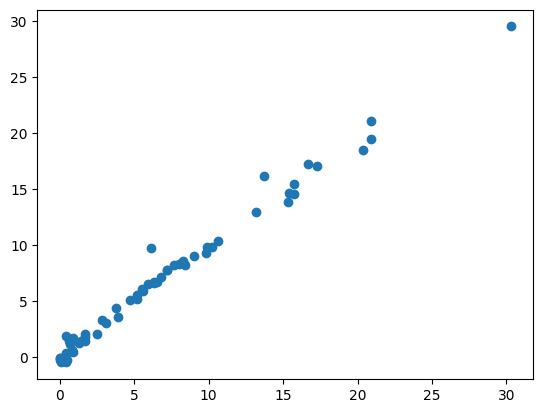

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'mean squared error is {mae} and score is {score}')
plt.scatter(y_test,y_pred)

mean squared error is 0.5468236465249978 and score is 0.9847657384266951


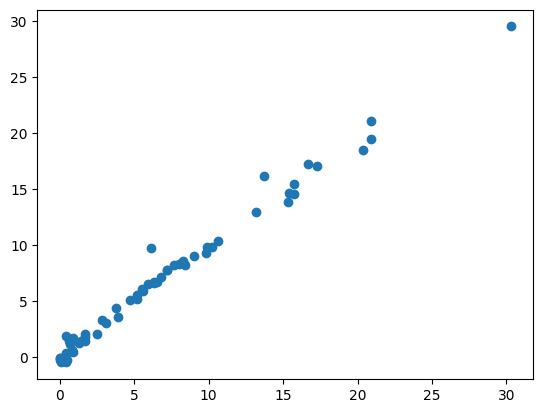

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
els=ElasticNet()
els.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'mean squared error is {mae} and score is {score}')
plt.scatter(y_test,y_pred)

mean squared error is 0.5468236465249978 and score is 0.9847657384266951


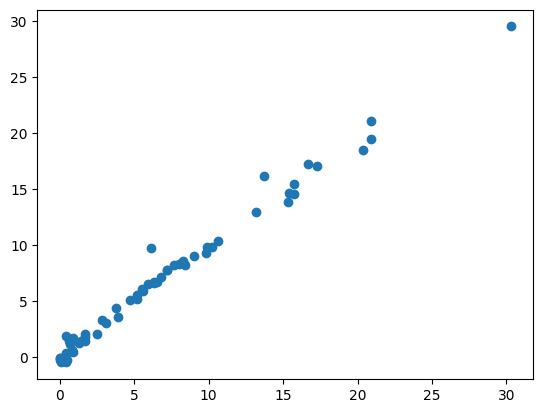

In [28]:
# cross validation(hyperpara tunning)
from sklearn.linear_model import LassoCV
lassocv=LassoCV()
lassocv.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'mean squared error is {mae} and score is {score}')

mean squared error is 0.5468236465249978 and score is 0.9847657384266951


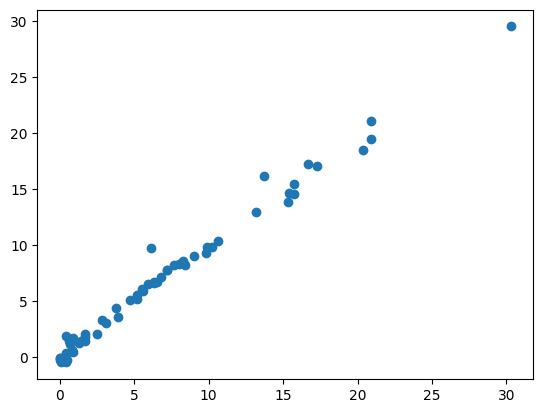

In [29]:
# cross validation(hyperpara tunning)
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'mean squared error is {mae} and score is {score}')

mean squared error is 0.5468236465249978 and score is 0.9847657384266951


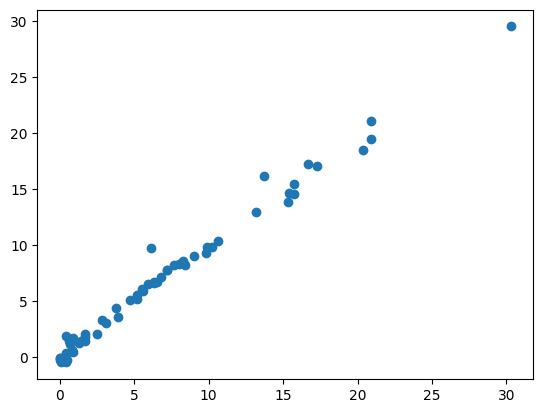

In [30]:
# cross validation(hyperpara tunning)
from sklearn.linear_model import ElasticNetCV
elsas=ElasticNetCV()
elsas.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f'mean squared error is {mae} and score is {score}')

In [31]:
ridge

Ridge()

In [32]:
scaler

StandardScaler()

In [33]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))